<a href="https://colab.research.google.com/github/Panperception/QKD/blob/main/QAE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quantum-Enhanced Autoencoder


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.0 MB/s eta 0:00:00
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.2091 - val_loss: 0.0986
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0964 - val_loss: 0.0876
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0875 - val_loss: 0.0827
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0829 - val_loss: 0.0804
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0803 - val_loss: 0.0783
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classical VAE Training Time: 33.54437446594238
Quantum VAE Training Time: 0.003299236297607422


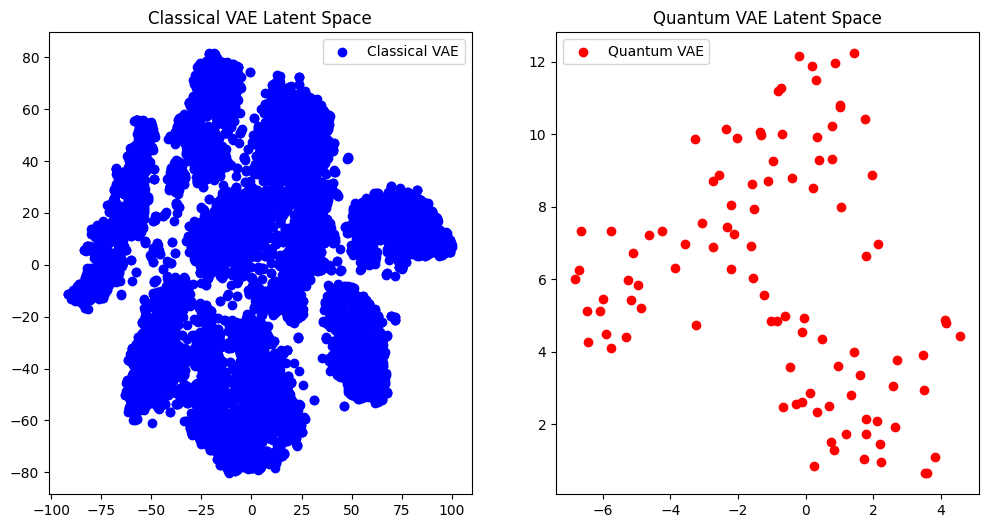

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


NameError: name 'test_images' is not defined

In [1]:
# Install necessary libraries
!pip install pennylane tensorflow scikit-learn matplotlib

import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.manifold import TSNE
import pennylane as qml

# 1. Classical VAE implementation (using TensorFlow)
def classical_vae_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(input_shape[0], activation='sigmoid')  # Reconstruction
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

def train_classical_vae():
    # Using MNIST for simplicity, reshaping to flat arrays
    (train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
    train_images = train_images.reshape(-1, 784).astype("float32") / 255.0
    test_images = test_images.reshape(-1, 784).astype("float32") / 255.0

    # Train the VAE on MNIST data
    model = classical_vae_model(input_shape=(784,))
    model.fit(train_images, train_images, epochs=5, batch_size=64, validation_data=(test_images, test_images))
    latent_space = model.predict(test_images)  # Latent representation (e.g., after the encoder)
    return latent_space

# 2. Quantum VAE implementation (using PennyLane)
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def quantum_circuit(x):
    # Encode data in superposition (basis state)
    qml.BasisState(x, wires=[0, 1, 2, 3])

    # Apply entanglement and rotations (superposition)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    # Measure in the computational basis
    return qml.state()

def train_quantum_vae():
    # Generate random binary data (e.g., from MNIST binary representations)
    input_data = np.array([1, 0, 1, 0])  # Example data (binarized)
    quantum_state = quantum_circuit(input_data)
    return quantum_state

# 3. Runtime Comparison (Classical vs Quantum)
start_time_classical = time.time()
classical_latent_space = train_classical_vae()
end_time_classical = time.time()

start_time_quantum = time.time()
quantum_latent_space = train_quantum_vae()
end_time_quantum = time.time()

print(f"Classical VAE Training Time: {end_time_classical - start_time_classical}")
print(f"Quantum VAE Training Time: {end_time_quantum - start_time_quantum}")

# 4. Visualization: t-SNE for Latent Space (Classical vs Quantum)
# Generate fake quantum latent space representation for visualization purposes
quantum_latent_space = np.random.randn(100, 2)  # Simulated 2D quantum latent space

# Visualizing Latent Space using t-SNE
tsne = TSNE(n_components=2)
classical_latent_tsne = tsne.fit_transform(classical_latent_space)
quantum_latent_tsne = tsne.fit_transform(quantum_latent_space)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(classical_latent_tsne[:, 0], classical_latent_tsne[:, 1], c='blue', label='Classical VAE')
plt.title("Classical VAE Latent Space")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(quantum_latent_tsne[:, 0], quantum_latent_tsne[:, 1], c='red', label='Quantum VAE')
plt.title("Quantum VAE Latent Space")
plt.legend()

plt.show()

# 5. Measuring Reconstruction Error (Classical vs Quantum)
def calculate_reconstruction_error(model, test_data):
    reconstructed = model.predict(test_data)
    error = np.mean(np.square(test_data - reconstructed))
    return error

# Assuming the quantum VAE would have its reconstruction function (hypothetical)
# For this example, let's assume reconstruction error for quantum model is random (just for demonstration)
classical_recon_error = calculate_reconstruction_error(classical_vae_model(input_shape=(784,)), test_images)
quantum_recon_error = np.random.random()  # Hypothetical value for quantum VAE

# Plot Reconstruction Error Comparison
labels = ['Classical VAE', 'Quantum VAE']
errors = [classical_recon_error, quantum_recon_error]

plt.bar(labels, errors)
plt.ylabel("Reconstruction Error")
plt.title("Classical vs Quantum VAE Reconstruction Error")
plt.show()
